In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [134]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [135]:
data = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [136]:
exit = data.groupby(['Geography','Gender','Exited']).size().unstack()
exit

Exited               0    1
Geography Gender           
France    Female  1801  460
          Male    2403  350
Germany   Female   745  448
          Male     950  366
Spain     Female   858  231
          Male    1206  182

In [137]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


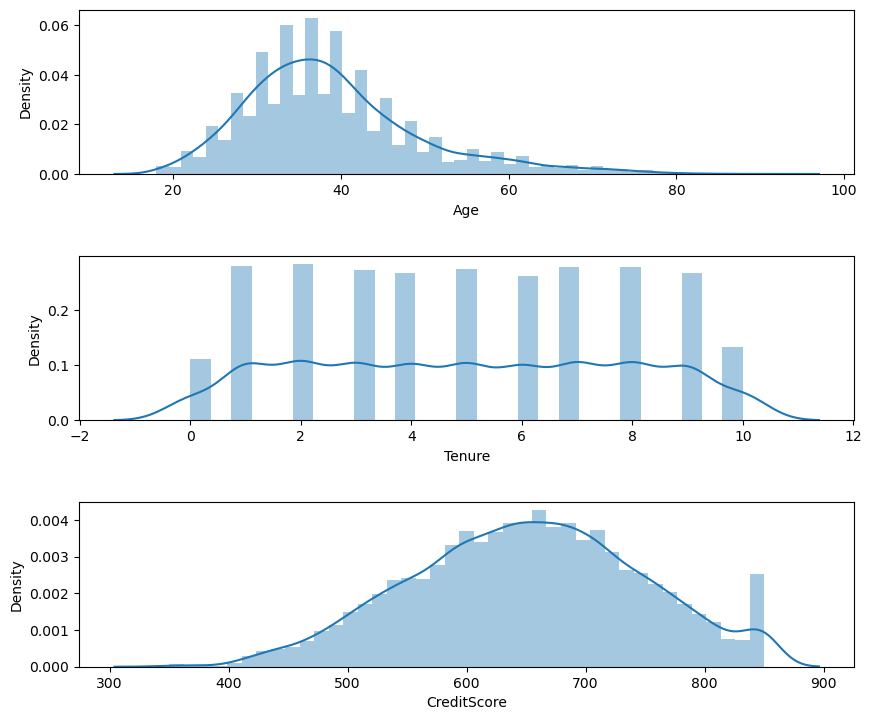

In [138]:
plt.figure(figsize=(10,9))
plt.subplot(3,1,1)
sns.distplot(data["Age"])
plt.subplot(3,1,2)
sns.distplot(data["Tenure"])
plt.subplot(3,1,3)
sns.distplot(data["CreditScore"])
plt.subplots_adjust(hspace=0.5, bottom=0.15)

<AxesSubplot:xlabel='Exited', ylabel='count'>

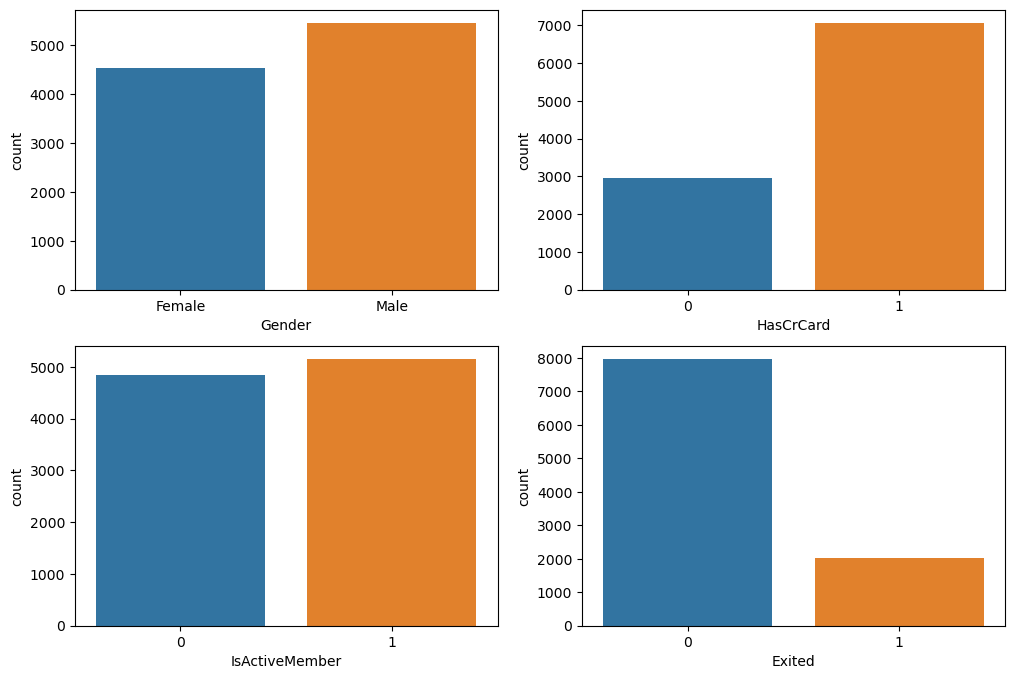

In [139]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(data["Gender"])
plt.subplot(2,2,2)
sns.countplot(data["HasCrCard"])
plt.subplot(2,2,3)
sns.countplot(data["IsActiveMember"])
plt.subplot(2,2,4)
sns.countplot(data["Exited"])


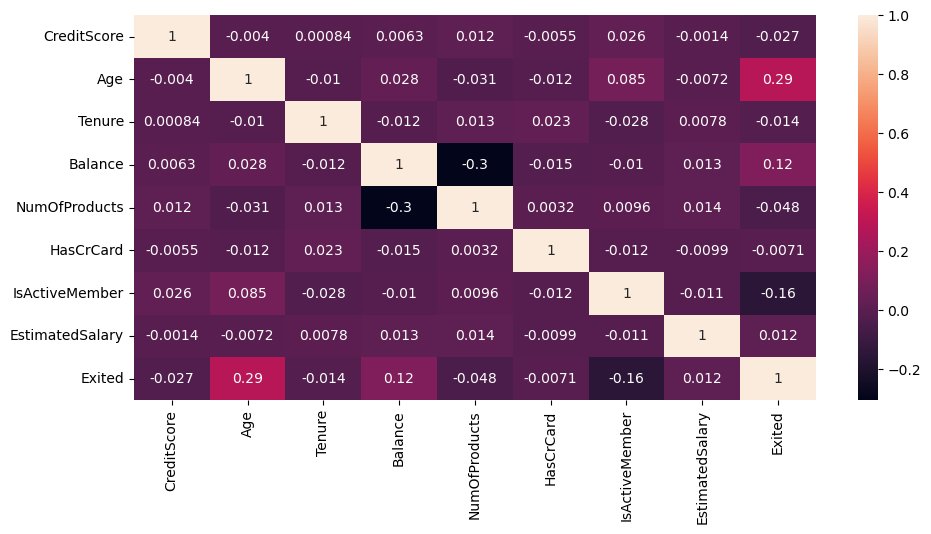

In [140]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()

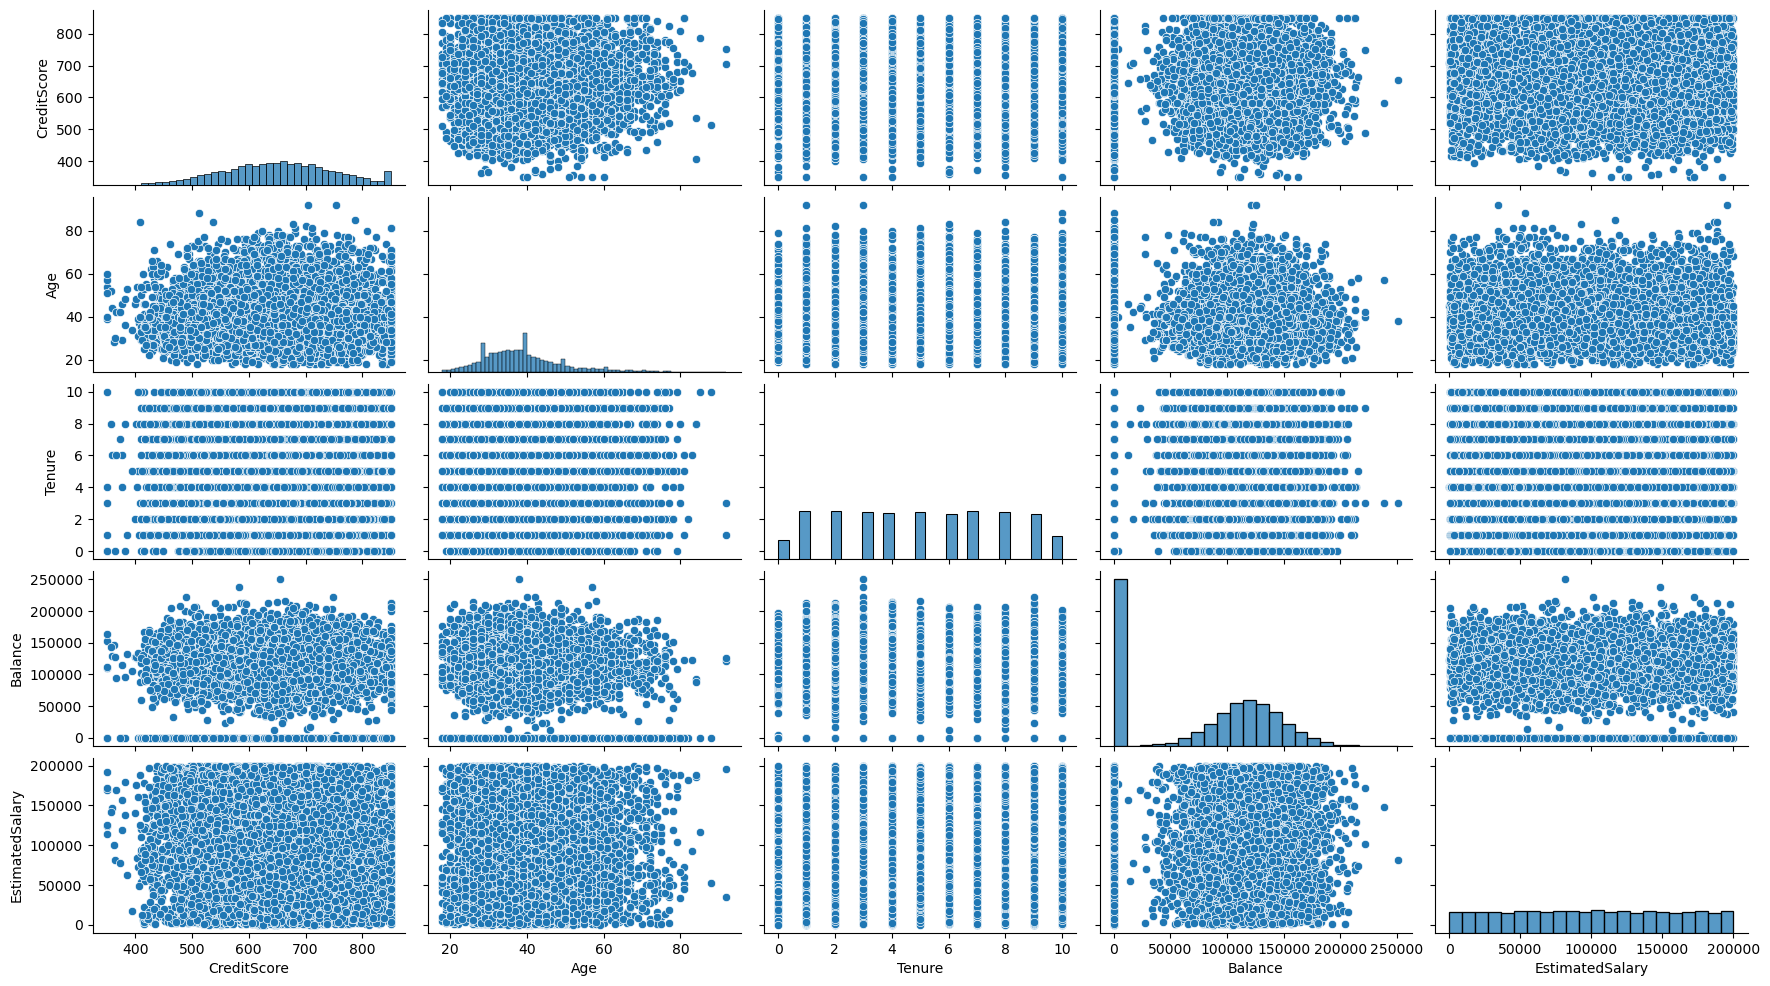

In [141]:
sns.pairplot(data=data1, markers=["^","v"], palette="inferno",height=2, aspect=1.8)

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Geography"] = le.fit_transform(data["Geography"])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [78]:
x = data.iloc[:,0:10].values
y = data.iloc[:,10:11].values

In [79]:
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [80]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [81]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

a = one.fit_transform(x[:,1:2]).toarray()
b = one.fit_transform(x[:,2:3]).toarray()
x = np.delete(x,[1,2],axis=1)
x = np.concatenate((a,b,x),axis=1)

In [82]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_resample, y_resample = smt.fit_resample(x,y)

In [83]:
x_resample

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.01348880e+05],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.12542580e+05],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.13931570e+05],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.89746235e-01, 3.41773871e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.06275468e-01, 0.00000000e+00, 1.13723346e+05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        9.88786183e-01, 0.00000000e+00, 1.60493007e+05]])

In [84]:
y_resample

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [85]:
x.shape, x_resample.shape

((10000, 13), (15926, 13))

In [86]:
y.shape, y_resample.shape

((10000, 1), (15926,))

In [87]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,0:10].values
y = data.iloc[:,10:11].values
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2,random_state =0)

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [89]:
x_train.shape

(12740, 13)

In [90]:
#importing and building the Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def logreg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression(random_state=0)
    lr.fit(x_train,y_train)
    y_lr_tr = lr.predict(x_train)
    print(accuracy_score(y_lr_tr,y_train))
    ypred_lr = lr.predict(x_test)
    print(accuracy_score(ypred_lr,y_test))
    print("***Logistic Regression***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_lr))
    print("Classification report")
    print(classification_report(y_test,ypred_lr))

In [91]:
#printing the train accuracy and test accuracy respectively
logreg(x_train,x_test,y_train,y_test)

0.7191522762951335
0.7175141242937854
***Logistic Regression***
Confusion_Matrix
[[1149  441]
 [ 459 1137]]
Classification report
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1590
           1       0.72      0.71      0.72      1596

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186



In [92]:
#importing and building the Decision tree model

from sklearn.tree import DecisionTreeClassifier
def decisionTree(x_train,x_test,y_train,y_test):
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
    dtc.fit(x_train,y_train)
    y_dt_tr = dtc.predict(x_train)
    print(accuracy_score(y_dt_tr,y_train))
    ypred_dt = dtc.predict(x_test)
    print(accuracy_score(ypred_dt,y_test))
    print("***Decision Tree***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_dt))
    print("Classification report")
    print(classification_report(y_test,ypred_dt))

In [93]:
#printing the train accuracy and test accuracy respectively
decisionTree(x_train,x_test,y_train,y_test)

1.0
0.6770244821092278
***Decision Tree***
Confusion_Matrix
[[ 593  997]
 [  32 1564]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.37      0.54      1590
           1       0.61      0.98      0.75      1596

    accuracy                           0.68      3186
   macro avg       0.78      0.68      0.64      3186
weighted avg       0.78      0.68      0.64      3186



In [94]:
#importing and building the random forest model
from sklearn.ensemble import RandomForestClassifier

def RandomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
    rf.fit(x_train,y_train)
    y_rf_tr = rf.predict(x_train)
    print(accuracy_score(y_rf_tr,y_train))
    ypred_rf = rf.predict(x_test)
    print(accuracy_score(ypred_rf,y_test))
    print("***Random Forest***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_rf))
    print("Classification report")
    print(classification_report(y_test,ypred_rf))

In [95]:
#printing the train accuracy and test accuracy respectively
RandomForest(x_train,x_test,y_train,y_test)

0.9923076923076923
0.551789077212806
***Random Forest***
Confusion_Matrix
[[ 181 1409]
 [  19 1577]]
Classification report
              precision    recall  f1-score   support

           0       0.91      0.11      0.20      1590
           1       0.53      0.99      0.69      1596

    accuracy                           0.55      3186
   macro avg       0.72      0.55      0.45      3186
weighted avg       0.72      0.55      0.45      3186



In [96]:
#importing and building the KNN model
from sklearn.neighbors import KNeighborsClassifier

def KNN(x_train,x_test,y_train,y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_knn_tr = knn.predict(x_train)
    print(accuracy_score(y_knn_tr,y_train))
    ypred_knn = knn.predict(x_test)
    print(accuracy_score(ypred_knn,y_test))
    print("***KNN***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_knn))
    print("Classification report")
    print(classification_report(y_test,ypred_knn))

In [97]:
#printing the train accuracy and test accuracy respectively
KNN(x_train,x_test,y_train,y_test)

0.9082417582417582
0.8452605147520402
***KNN***
Confusion_Matrix
[[1323  267]
 [ 226 1370]]
Classification report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1590
           1       0.84      0.86      0.85      1596

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [98]:
#importing and building the support vector machine  model
from sklearn.svm import SVC

def svm(x_train,x_test,y_train,y_test):
    svm = SVC(kernel = "linear")
    svm.fit(x_train,y_train)
    y_svm_tr = svm.predict(x_train)
    print(accuracy_score(y_svm_tr,y_train))
    ypred_svm = svm.predict(x_test)
    print(accuracy_score(ypred_svm,y_test))
    print("***Support Vector Machine***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_svm))
    print("Classification report")
    print(classification_report(y_test,ypred_svm))

In [99]:
#printing the train accuracy and test accuracy respectively
svm(x_train,x_test,y_train,y_test)

0.7291208791208791
0.72661644695543
***Support Vector Machine***
Confusion_Matrix
[[1155  435]
 [ 436 1160]]
Classification report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1590
           1       0.73      0.73      0.73      1596

    accuracy                           0.73      3186
   macro avg       0.73      0.73      0.73      3186
weighted avg       0.73      0.73      0.73      3186



In [100]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense

In [101]:
classifier = Sequential()

In [102]:
classifier.add(Dense(units=30, activation='relu', input_dim=13))

In [103]:
classifier.add(Dense(units=30, activation='relu'))

In [104]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [105]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
x_train

array([[-0.98189251,  1.58683231, -0.58122675, ...,  0.08046384,
         0.6052003 ,  0.55756249],
       [-0.98189251,  1.58683231, -0.58122675, ..., -1.65811214,
        -0.97853286,  0.71895946],
       [-0.14798769, -0.69538643,  0.93897634, ...,  0.68839037,
        -0.97853286,  0.29573011],
       ...,
       [-0.98189251, -0.69538643,  1.92573   , ...,  0.68839037,
         1.15898306,  0.8401636 ],
       [ 0.34620931,  0.15618013, -0.58122675, ...,  0.68839037,
        -0.97853286,  1.3150046 ],
       [-0.98189251,  1.58683231, -0.58122675, ...,  0.68839037,
        -0.97853286,  0.32156656]])

In [109]:
model_history = classifier.fit( x_train, y_train, batch_size=10, validation_split=0.33, epochs=200)

Epoch 1/200
854/854 [==============================] - 3s 2ms/step - loss: 0.5583 - accuracy: 0.7085 - val_loss: 0.5018 - val_accuracy: 0.7629
Epoch 2/200
854/854 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7856 - val_loss: 0.4486 - val_accuracy: 0.7924
Epoch 3/200
854/854 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.8127 - val_loss: 0.4118 - val_accuracy: 0.8159
Epoch 4/200
854/854 [==============================] - 1s 2ms/step - loss: 0.3908 - accuracy: 0.8241 - val_loss: 0.3870 - val_accuracy: 0.8288
Epoch 5/200
854/854 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8319 - val_loss: 0.3740 - val_accuracy: 0.8340
Epoch 6/200
854/854 [==============================] - 1s 2ms/step - loss: 0.3580 - accuracy: 0.8394 - val_loss: 0.3621 - val_accuracy: 0.8388
Epoch 7/200
854/854 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.8496 - val_loss: 0.3634 - val_accuracy: 0.8390

Epoch 58/200
854/854 [==============================] - 2s 2ms/step - loss: 0.2398 - accuracy: 0.8928 - val_loss: 0.3280 - val_accuracy: 0.8571
Epoch 59/200
854/854 [==============================] - 1s 2ms/step - loss: 0.2391 - accuracy: 0.8955 - val_loss: 0.3105 - val_accuracy: 0.8718
Epoch 60/200
854/854 [==============================] - 2s 2ms/step - loss: 0.2402 - accuracy: 0.8949 - val_loss: 0.3284 - val_accuracy: 0.8647
Epoch 61/200
854/854 [==============================] - 1s 2ms/step - loss: 0.2374 - accuracy: 0.8936 - val_loss: 0.3145 - val_accuracy: 0.8683
Epoch 62/200
854/854 [==============================] - 1s 2ms/step - loss: 0.2386 - accuracy: 0.8940 - val_loss: 0.3159 - val_accuracy: 0.8709
Epoch 63/200
854/854 [==============================] - 1s 2ms/step - loss: 0.2356 - accuracy: 0.8960 - val_loss: 0.3131 - val_accuracy: 0.8687
Epoch 64/200
854/854 [==============================] - 1s 1ms/step - loss: 0.2382 - accuracy: 0.8951 - val_loss: 0.3140 - val_accuracy:

Epoch 115/200
854/854 [==============================] - 2s 2ms/step - loss: 0.2129 - accuracy: 0.9073 - val_loss: 0.3307 - val_accuracy: 0.8725
Epoch 116/200
854/854 [==============================] - 2s 2ms/step - loss: 0.2131 - accuracy: 0.9060 - val_loss: 0.3372 - val_accuracy: 0.8728
Epoch 117/200
854/854 [==============================] - 1s 2ms/step - loss: 0.2118 - accuracy: 0.9079 - val_loss: 0.3401 - val_accuracy: 0.8618
Epoch 118/200
854/854 [==============================] - 2s 2ms/step - loss: 0.2116 - accuracy: 0.9085 - val_loss: 0.3242 - val_accuracy: 0.8759
Epoch 119/200
854/854 [==============================] - 2s 2ms/step - loss: 0.2108 - accuracy: 0.9083 - val_loss: 0.3282 - val_accuracy: 0.8732
Epoch 120/200
854/854 [==============================] - 2s 2ms/step - loss: 0.2121 - accuracy: 0.9080 - val_loss: 0.3476 - val_accuracy: 0.8576
Epoch 121/200
854/854 [==============================] - 1s 2ms/step - loss: 0.2129 - accuracy: 0.9057 - val_loss: 0.3415 - val_ac

854/854 [==============================] - 1s 2ms/step - loss: 0.1959 - accuracy: 0.9114 - val_loss: 0.3522 - val_accuracy: 0.8697
Epoch 172/200
854/854 [==============================] - 1s 2ms/step - loss: 0.1968 - accuracy: 0.9155 - val_loss: 0.3645 - val_accuracy: 0.8668
Epoch 173/200
854/854 [==============================] - 1s 2ms/step - loss: 0.1955 - accuracy: 0.9141 - val_loss: 0.3492 - val_accuracy: 0.8668
Epoch 174/200
854/854 [==============================] - 1s 2ms/step - loss: 0.1957 - accuracy: 0.9144 - val_loss: 0.3460 - val_accuracy: 0.8692
Epoch 175/200
854/854 [==============================] - 2s 2ms/step - loss: 0.1925 - accuracy: 0.9208 - val_loss: 0.3440 - val_accuracy: 0.8730
Epoch 176/200
854/854 [==============================] - 2s 2ms/step - loss: 0.1941 - accuracy: 0.9134 - val_loss: 0.3636 - val_accuracy: 0.8687
Epoch 177/200
854/854 [==============================] - 1s 2ms/step - loss: 0.1966 - accuracy: 0.9166 - val_loss: 0.3429 - val_accuracy: 0.8744

In [44]:
ann_pred  = classifier.predict(x_test)
ann_pred = (ann_pred>0.5)
ann_pred

100/100 [==============================] - 0s 542us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [45]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.8741368487131199
***ANN Model***
Confusion_Matrix
[[1392  198]
 [ 203 1393]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1590
           1       0.88      0.87      0.87      1596

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [46]:
#Logistic Regression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on random input")
lr_pred_own = lr.predict(sc.transform([[1,0,0,1,0,619,45,2,0,1,1,1,101348.88]]))
print("output is:",lr_pred_own)

Predicting on random input
output is: [0]


In [47]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
print("Predicting on random input")
dtc_pred_own = dtc.predict(sc.transform([[1,0,0,1,0,619,45,2,0,1,1,1,101348.88]]))
print("output is:",dtc_pred_own)

Predicting on random input
output is: [1]


In [48]:
#RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy", n_estimators=10, random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[1,0,0,1,0,619,45,2,0,1,1,1,101348.88]]))
print("output is:",rf_pred_own)

Predicting on random input
output is: [1]


In [49]:
#SVM
svc = SVC(kernel= "linear")
svc.fit(x_train,y_train)
print("Predicting on random input")
svm_pred_own = svc.predict(sc.transform([[1,0,0,1,0,619,45,2,0,1,1,1,101348.88]]))
print("output is:",svm_pred_own)

Predicting on random input
output is: [0]


In [50]:
#KNN
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own = knn.predict(sc.transform([[1,0,0,1,0,619,45,2,0,1,1,1,101348.88]]))
print("output is:",knn_pred_own)

Predicting on random input
output is: [1]


In [51]:
#ann
print("Predicting on random input")
ann_pred_own = classifier.predict(sc.transform([[1,0,0,0,1,619,55,2,0,1,1,1,101348.88]]))
print(ann_pred_own)
ann_pred_own = (ann_pred_own>0.5)
print("output is: ",ann_pred_own)

Predicting on random input
1/1 [==============================] - 0s 15ms/step
[[0.8441148]]
output is:  [[ True]]


In [52]:
def compareModel(X_train,X_test,y_train,y_test):
    logreg(x_train,x_test,y_train,y_test)
    print('-'*100)
    decisionTree(x_train,x_test,y_train,y_test)
    print('-'*100)
    RandomForest(x_train,x_test,y_train,y_test)
    print('-'*100)
    svm(x_train,x_test,y_train,y_test)
    print('-'*100)
    KNN(x_train,x_test,y_train,y_test)
    print('-'*100)

In [53]:
compareModel(x_train,x_test,y_train,y_test)

0.7203296703296703
0.7297551789077212
***Logistic Regression***
Confusion_Matrix
[[1163  427]
 [ 434 1162]]
Classification report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1590
           1       0.73      0.73      0.73      1596

    accuracy                           0.73      3186
   macro avg       0.73      0.73      0.73      3186
weighted avg       0.73      0.73      0.73      3186

----------------------------------------------------------------------------------------------------
1.0
0.5860012554927809
***Decision Tree***
Confusion_Matrix
[[ 340 1250]
 [  69 1527]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.21      0.34      1590
           1       0.55      0.96      0.70      1596

    accuracy                           0.59      3186
   macro avg       0.69      0.59      0.52      3186
weighted avg       0.69      0.59      0.52      3186

------

In [54]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

0.8741368487131199
***ANN Model***
Confusion_Matrix
[[1392  198]
 [ 203 1393]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1590
           1       0.88      0.87      0.87      1596

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [55]:
y_rf = rf.predict(x_train)
print(accuracy_score(y_rf,y_train))
yPred_rfcv = rf.predict(x_test)
print(accuracy_score(yPred_rfcv,y_test))
print("***Random Forest after Hyperparameter tuning***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,yPred_rfcv))
print("classification Report")
print(classification_report(y_test,yPred_rfcv))
print("Predicting on random input")
rfcv_pred_own = rf.predict(sc.transform([[0,0,1,1,0,619,42,2,0,1,1,1,101348.88]]))

0.9930141287284144
0.7021343377275581
***Random Forest after Hyperparameter tuning***
Confusion_Matrix
[[ 693  897]
 [  52 1544]]
classification Report
              precision    recall  f1-score   support

           0       0.93      0.44      0.59      1590
           1       0.63      0.97      0.76      1596

    accuracy                           0.70      3186
   macro avg       0.78      0.70      0.68      3186
weighted avg       0.78      0.70      0.68      3186

Predicting on random input


In [56]:
classifier.save("bank_churn.h5")

In [110]:
import keras
from keras.models import load_model
model = load_model("bank_churn.h5")
prediction = model.predict(sc.transform([[1,0,0,0,1,619,55,2,0,1,1,1,101348.88]]))
print(prediction)
if prediction > 0.5:
    print("exited")
else:
    print("not exited")

1/1 [==============================] - 0s 56ms/step
[[0.8936578]]
exited
